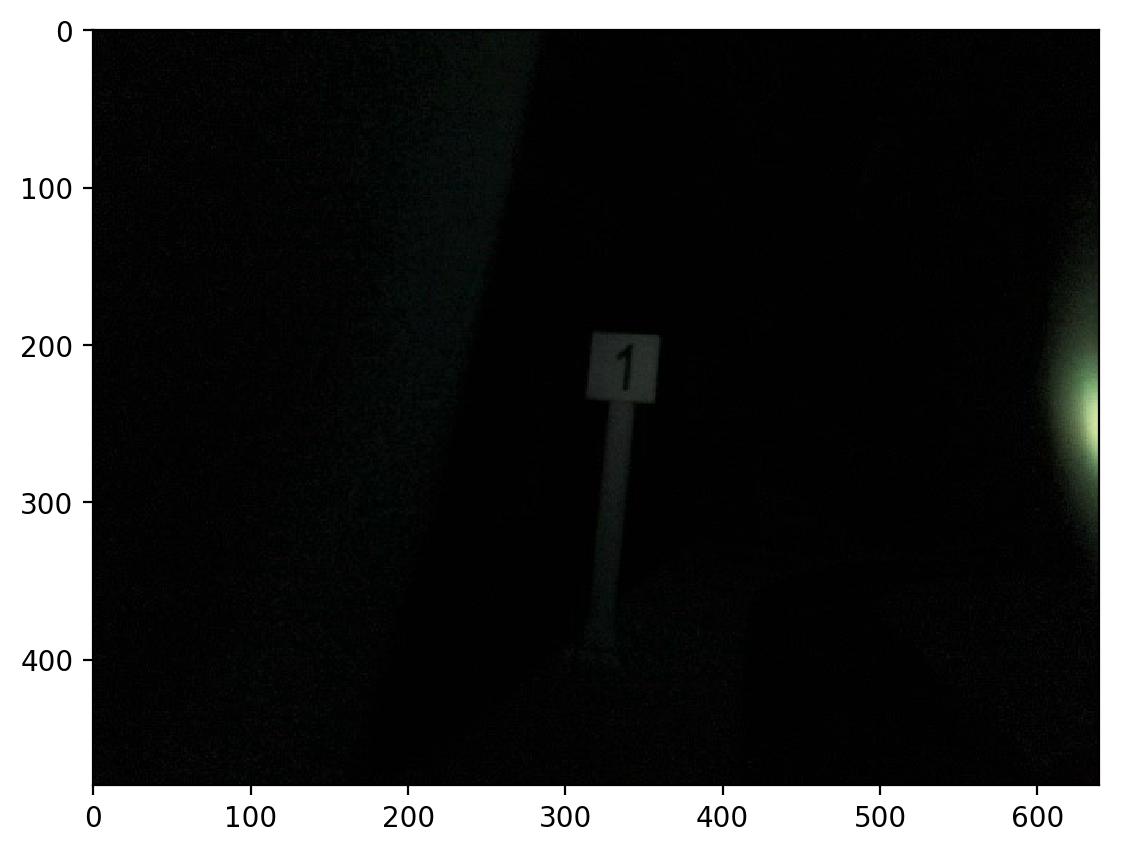

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
%matplotlib inline
# resolution of images in figure
mpl.rcParams['figure.dpi']= 200
# figure size in inches
mpl.rcParams["figure.figsize"] = [10,5]

img = cv2.imread('images/shutter9_iso800/white/white_1_2.jpg')
plt.imshow(img)

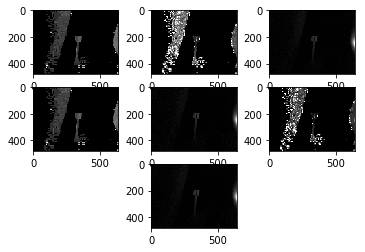

In [2]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hsv_h,hsv_s,hsv_v = cv2.split(hsv)
hls_h,hls_l,hls_s = cv2.split(hls)
plt.subplot(3, 3, 1)
plt.imshow(hsv_h, cmap='gray')
plt.subplot(3, 3, 2)
plt.imshow(hsv_s, cmap='gray')
plt.subplot(3, 3, 3)
plt.imshow(hsv_v, cmap='gray')
plt.subplot(3, 3, 4)
plt.imshow(hls_h, cmap='gray')
plt.subplot(3, 3, 5)
plt.imshow(hls_l, cmap='gray')
plt.subplot(3, 3, 6)
plt.imshow(hls_s, cmap='gray')
plt.subplot(3, 3, 8)
plt.imshow(gray, cmap='gray')

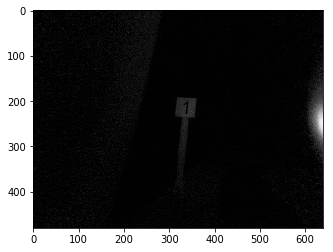

In [3]:
height, width = hsv_v.shape

imgTopHat = np.zeros((height, width, 1), np.uint8)
imgBlackHat = np.zeros((height, width, 1), np.uint8)

structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

imgTopHat = cv2.morphologyEx(hsv_v, cv2.MORPH_TOPHAT, structuringElement)
imgBlackHat = cv2.morphologyEx(hsv_v, cv2.MORPH_BLACKHAT, structuringElement)

imgGrayscalePlusTopHat = cv2.add(hsv_v, imgTopHat)
imgGrayscalePlusTopHatMinusBlackHat = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)

imgMaxContrast = imgGrayscalePlusTopHatMinusBlackHat
plt.imshow(imgMaxContrast, cmap='gray')

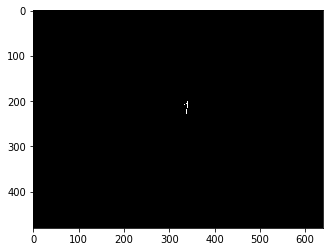

In [4]:
GAUSSIAN_SMOOTH_FILTER_SIZE = (5, 5)
ADAPTIVE_THRESH_BLOCK_SIZE = 11
ADAPTIVE_THRESH_WEIGHT = 9

imgBlurred = np.zeros((height, width, 1), np.uint8)

imgBlurred = cv2.GaussianBlur(imgMaxContrast, GAUSSIAN_SMOOTH_FILTER_SIZE, 0)
imgThresh = cv2.adaptiveThreshold(imgBlurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, ADAPTIVE_THRESH_BLOCK_SIZE, ADAPTIVE_THRESH_WEIGHT)

plt.imshow(imgThresh, cmap='gray')

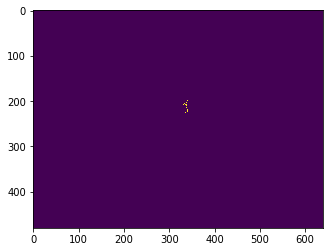

In [13]:
# Find edges in the image using canny edge detection method
# Calculate lower threshold and upper threshold using sigma = 0.33
v = np.median(imgMaxContrast)
low = 40
high = 220

edged = cv2.Canny(imgMaxContrast, low, high)

plt.imshow(edged)

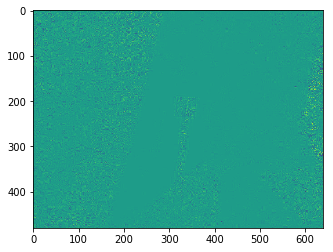

In [8]:
imgThresh = cv2.Laplacian(imgMaxContrast,cv2.CV_64F)
plt.imshow(imgThresh)